<a href="https://colab.research.google.com/github/terinkov/DataAnalysis/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по интервалам оценок в Python

Всего четрые задачи: две простых и две непростых. В последней необходимо проделать небольшую теоретическую работу.

## Справка по теории к задачам по доверительным интервалам

### 1. Основные понятия доверительных интервалов
Доверительный интервал (CI) – это диапазон значений, который, с определенной вероятностью, содержит истинное значение параметра распределения.

**Формула для нормального доверительного интервала:**
\begin{equation}
CI = \hat{\theta} \pm z_{\alpha/2} \cdot SE(\hat{\theta})
\end{equation}
где $\hat{\theta}$ – точечная оценка параметра, $SE(\hat{\theta})$ – стандартная ошибка, а $z_{\alpha/2}$ – квантиль нормального распределения.

### 2. Методы построения доверительных интервалов
#### 2.1. Классический метод на основе информации Фишера
Если оценка параметра $\hat{\theta}$ асимптотически нормально распределена, доверительный интервал определяется через стандартную ошибку:
\begin{equation}
CI = \hat{\theta} \pm z_{\alpha/2} \cdot \frac{1}{\sqrt{I(\hat{\theta})}}
\end{equation}
где $I(\hat{\theta})$ – информация Фишера.

#### 2.2. Метод бутстрапа
Метод бутстрапа используется, когда стандартные предположения о распределении параметра нарушены. Основные шаги:
1. Генерируются бутстрап-выборки из исходных данных.
2. Для каждой выборки вычисляется оценка параметра.
3. Определяются квантильные границы интервала.

#### 2.3. Байесовские доверительные интервалы
В Байесовском подходе параметры моделируются как случайные величины. Доверительный интервал строится как область высокой плотности (HPDI - Highest Posterior Density Interval):
\begin{equation}
P(\theta_L \leq \theta \leq \theta_U | X) = 1 - \alpha.
\end{equation}

**Как вычислить HPDI**

Пусть у нас есть выборка $\mathbf{X}=(X_1,X_2,...,X_n)$ и соответствующая ей апостериорная плотность вероятности $f(\theta|\pi)$. Тогда HPDI с уровнем доверия $\alpha$ определяется как множество значений $\theta$, таких что:

$$ \text{HPDI}_{\alpha} = \{\theta : \pi(\theta | \mathbf{X}) > k\}$$

где $k$ выбирается таким образом, чтобы суммарная вероятность всех точек внутри этого множества была равна $\alpha$.

Другими словами, мы ищем такие значения $\theta$, для которых плотность вероятности больше некоторого порога $k$. Этот порог $k$ находится так, чтобы сумма вероятностей этих значений составляла заданный уровень доверия $\alpha$.
Алгоритм нахождения HPDI:

1. Сортировка: Отсортируйте все значения $\theta$ по убыванию плотности вероятности $f(\theta|\pi)$.
2. Итерации: Начните с первого элемента отсортированного списка и суммируйте вероятности до тех пор, пока их сумма не превысит $\alpha$. Все элементы, включенные в эту сумму, будут составлять HPDI.
3. Если сумма вероятностей не достигает $\alpha$, продолжайте добавлять следующие элементы из списка, пока не достигнете нужного уровня доверия.

Этот метод позволяет получить наиболее плотное распределение вероятностей, соответствующее уровню доверия $\alpha$.

### 3. Применение доверительных интервалов
В домашней работе предлагается рассмотреть следующие:
1. Построение классического доверительного интервала для параметра нормального распределения.
2. Использование бутстрапа для оценки устойчивости оценок.
3. Оценка параметра экспоненциального распределения методом максимального правдоподобия и построение доверительного интервала.
4. Байесовский анализ параметра распределения и сравнение различных методов построения доверительных интервалов.

Каждый метод имеет свои преимущества и недостатки. Выбор подходящего метода зависит от свойств данных, размера выборки и предположений о распределении параметра.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

## Задача 1 ($\Sigma$ = 13б)
Неходимо построить доверительные интервалы для среднего нормального распределения:
1. (4б) Сгенерировать выборку из нормального распределения
2. (5б) Вычислить доверительный интервал для среднего
3. (4б) Визуализировать результаты

### --- Этап 1: Генерация выборки из нормального распределения ---

In [ ]:
np.random.seed(42)  # Фиксируем случайность для воспроизводимости
mu, sigma, n = 10, 2, 100  # Среднее, стандартное отклонение, размер выборки
sample = np.random.normal(mu, sigma, n)

### --- Этап 2: Вычисление доверительного интервала для среднего ---

In [ ]:
confidence = 0.95
mean_sample = np.mean(sample)
sem_sample = stats.sem(sample)
ci = stats.t.interval(confidence, df=n-1, loc=mean_sample, scale=sem_sample)

print(f"Доверительный интервал для среднего: {ci}")


Доверительный интервал для среднего: (9.431906327276199, 10.152707603147427)


### --- Этап 3: Визуализация результатов ---

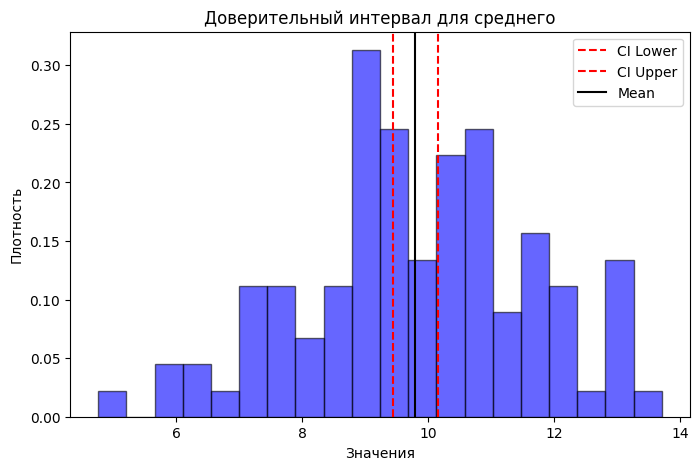

In [ ]:
# Этап 3: Визуализация результатов
plt.figure(figsize=(8, 5))
plt.hist(sample, bins=20, alpha=0.6, color='blue', edgecolor='black', density=True)

# Отображение доверительного интервала
plt.axvline(ci[0], color='red', linestyle='dashed', label='CI Lower')
plt.axvline(ci[1], color='red', linestyle='dashed', label='CI Upper')
plt.axvline(mean_sample, color='black', linestyle='solid', label='Mean')

plt.title("Доверительный интервал для среднего")
plt.xlabel("Значения")
plt.ylabel("Плотность")
plt.legend()
plt.show()


## Задача 2 ($\Sigma$ = 11б)
Используйте бутстрап-методы для анализа устойчивости доверительных интервалов
1. (2б) Добавьте в выборку из предыдущей задачи выбросы
2. (5б) Рассчитать доверительный интервал классическим способом и бутстрап-методом
3. (4б) Сравнить устойчивость интервалов

### --- Этап 1: Генерация выборки и добавление выбросов ---

In [ ]:
np.random.seed(42)  # Фиксируем случайность для воспроизводимости
mu, sigma, n = 10, 2, 100  # Среднее, стандартное отклонение, размер выборки
sample_base = np.random.normal(mu, sigma, n)
outliers = [50,-20,65]  # Добавляем выбросы
sample = np.concatenate((sample_base, outliers))

### --- Этап 2: Расчет доверительных интервалов классическим способом и бутстрап-методом ---

In [ ]:
confidence = 0.95
mean_sample = np.mean(sample)
sem_sample = stats.sem(sample)
ci_classic = stats.t.interval(confidence, df=len(sample)-1, loc=mean_sample, scale=sem_sample)

bootstrap_samples = 100
bootstrap_means = [np.mean(np.random.choice(sample, size=len(sample), replace=True)) for _ in range(bootstrap_samples)]
ci_bootstrap = np.percentile(bootstrap_means, [(1-confidence)/2 * 100, (1 + confidence)/2 * 100])

print(f"Классический доверительный интервал: {ci_classic}")
print(f"Бутстрап-доверительный интервал: {tuple(ci_bootstrap)}")


Классический доверительный интервал: (8.950980964611997, 11.907867511527446)
Бутстрап-доверительный интервал: (9.301393125843637, 11.444444924756784)


### --- Этап 3: Сравнение устойчивости интервалов ---

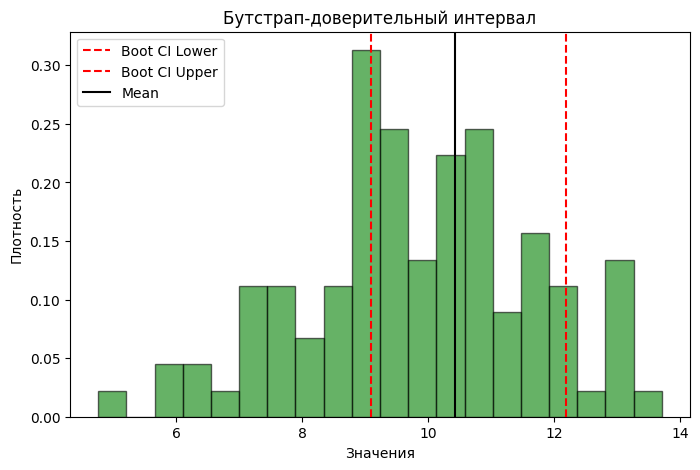

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(sample_base, bins=20, alpha=0.6, color='green', edgecolor='black', density=True)

# Отображение бутстрап-доверительного интервала
plt.axvline(ci_bootstrap[0], color='red', linestyle='dashed', label='Boot CI Lower')
plt.axvline(ci_bootstrap[1], color='red', linestyle='dashed', label='Boot CI Upper')
plt.axvline(mean_sample, color='black', linestyle='solid', label='Mean')

plt.title("Бутстрап-доверительный интервал")
plt.xlabel("Значения")
plt.ylabel("Плотность")
plt.legend()
plt.show()

## Задача 3 ($\Sigma$ = 18б)
Метод максимального правдоподобия и доверительные интервалы
1. (5б) Постройте оценку параметра экспоненциального распределения методом максимального правдоподобия (ММП)
2. (6б) Постройте доверительный интервал для оценки параметра из предыдущего пункта
3. (7б) Сравнените доверительные интервалы: классический через ММП, бутстрап

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample


In [ ]:
# Генерация выборки
np.random.seed(42)
lambda_true = 0.5  # Истинный параметр экспоненциального распределения
n = 1000
sample = np.random.exponential(1/lambda_true, n)

### --- Этап 1: Оценка параметра методом максимального правдоподобия ---

Оценка параметра λ методом ММП: 0.5141356729448809


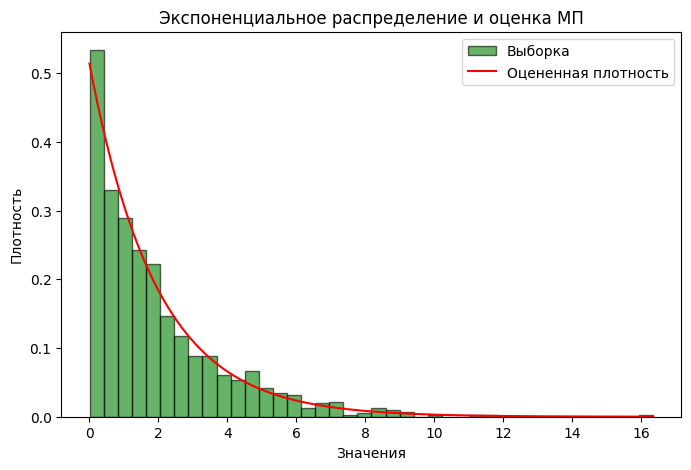

In [ ]:
lambda_mle = 1 / np.mean(sample)
print(f"Оценка параметра λ методом ММП: {lambda_mle}")

x = np.linspace(0, np.max(sample), 1000)
pdf_true = lambda_true * np.exp(-lambda_true * x)  # Теоретическая плотность
pdf_mle = lambda_mle * np.exp(-lambda_mle * x)  # Оцененная плотность

plt.figure(figsize=(8, 5))
plt.hist(sample, bins=40, density=True, alpha=0.6, color='g', edgecolor='black', label='Выборка')
plt.plot(x, pdf_mle, 'r-', label='Оцененная плотность')
plt.title("Экспоненциальное распределение и оценка МП")
plt.xlabel("Значения")
plt.ylabel("Плотность")
plt.legend()
plt.show()

### --- Этап 2: Построение доверительного интервала ---

In [ ]:
# Классический доверит интервал
# Оценка стандартной ошибки для lambda_mle
se_lambda = lambda_mle / np.sqrt(n)

# Уровень доверия (например, 95%)
confidence_level = 0.95
alpha = 1 - confidence_level

# Квантиль нормального распределения для заданного уровня доверия
z_score = stats.norm.ppf(1 - alpha / 2)

# Доверительный интервал для lambda
ci_lower = lambda_mle - z_score * se_lambda
ci_upper = lambda_mle + z_score * se_lambda

# Вывод результатов
print(f"Доверительный интервал для lambda (уровень значимости {confidence_level * 100}%): "
      f"({ci_lower}, {ci_upper})")

Доверительный интервал для lambda (уровень значимости 95.0%): (0.4822697993427009, 0.5460015465470609)


### --- Этап 3: Сравнение разных методов построения доверительных интервалов ---

In [ ]:
# Бутстрап-доверительный интервал
bootstrap_samples = 10000  # Увеличиваем количество бутстрап-выборок
bootstrap_estimates = [1 / np.mean(resample(sample)) for _ in range(bootstrap_samples)]

# Уровень доверия (например, 95%)
alpha = 0.05

# Корректное вычисление квантилей
ci_bootstrap = np.percentile(bootstrap_estimates, [alpha/2 * 100, (1 - alpha/2) * 100])

print(f"Бутстрап-доверительный интервал: {ci_bootstrap}")

Бутстрап-доверительный интервал: [0.48336565 0.54860443]


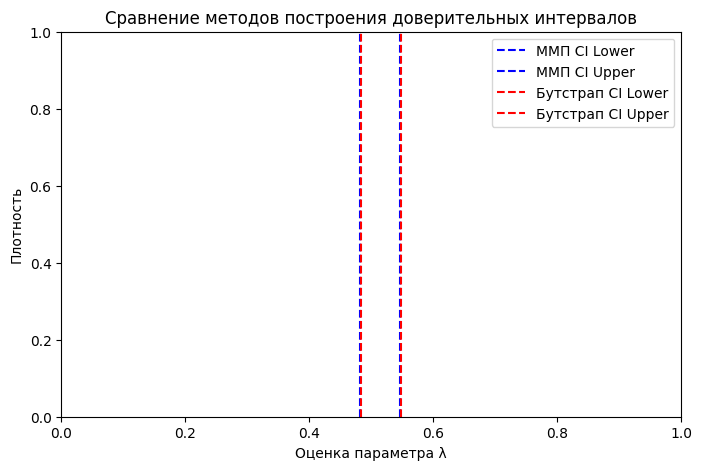

In [ ]:
plt.figure(figsize=(8, 5))
plt.axvline(ci_lower, color='blue', linestyle='dashed', label='ММП CI Lower')
plt.axvline(ci_upper, color='blue', linestyle='dashed', label='ММП CI Upper')
plt.axvline(ci_bootstrap[0], color='red', linestyle='dashed', label='Бутстрап CI Lower')
plt.axvline(ci_bootstrap[1], color='red', linestyle='dashed', label='Бутстрап CI Upper')
plt.title("Сравнение методов построения доверительных интервалов")
plt.xlabel("Оценка параметра λ")
plt.ylabel("Плотность")
plt.legend()
plt.show()


## Задача 4 ($\Sigma$ = 58б)
Доверительные интервалы и сравнение методов оценивания

Необходимо исследовать надежность доверительных интервалов при различных методах оценивания параметров

### Теоретическая часть: ($\Sigma$ = 12б)
(_ответ нужно выполнить на бумаге и прикрепить отдельным файлом PDF_)

Рассматривается случайная выборка $X_1, X_2, ..., X_n$ из экспоненциального распределения с параметром $\theta$. Предлагается использовать три метода оценивания параметра $\theta$:
   - **Метод моментов** (MM)
   - **Метод максимального правдоподобия** (MLE)
   - **Байесовский метод** (Bayesian)

Для каждого метода необходимо:
1. (4б) Найти точечную оценку параметра $\theta$.
2. (4б) Вывести формулы доверительных интервалов для $\theta$.
3. (4б) Сравнить свойства интервалов: ширина, устойчивость, покрытие.

### Практическая часть: ($\Sigma$ = 46б)

1. **Генерация данных:** (4б) Сгенерировать выборку из гамма-распределение с параметрами $\alpha, \beta$).

2. **Оценка параметров:** ($\Sigma$ = 18б)
   - (12б) Найти оценки $\theta$ методами MM, MLE и Bayesian.
   - (6б) Построить доверительные интервалы.

3. **Анализ и визуализация:** ($\Sigma$ = 12б)
   - (6б) Сравнить ширину доверительных интервалов.
   - (6б) Построить графики распределений оценок параметра.

4. **Выводы:** ($\Sigma$ = 12б)
   - (6б) Какой метод дает наиболее узкий интервал?
   - (6б) Как методы реагируют на небольшие изменения в данных?

## Практическая часть

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

### --- Этап 1: Генерация данных ---

In [ ]:
np.random.seed(42)
n = 10000  # размер выборки
alpha = 2  # параметр гамма-распределения
beta = 1/3  # параметр гамма-распределения (обратный масштабирующий)
sample = np.random.gamma(alpha, 1/beta, size=n)
sample = np.append(sample,[100,50])


Предполагаем, что оцениваем параметры alpha при неизвестном beta, beta при неизвестном alpha. Параметр сдвига "с" известен, c=0.
Далее использованы Точечные и интервальные оценки взятые из "https://files.stroyinf.ru/Data2/1/4294753/4294753128.pdf" (стр 6).
Метод моментов: стр 13, 14
Метод максимального правдоподобия: стр 16, 17. Но в силу того что таблица там табулирована, поэтому воспользуемся методами оптимизации функции правдоподобия парметров распределений.


### --- Этап 2: Метод моментов ---

In [ ]:
# Метод моментов (MM): Оценка параметров alpha и beta
mean_sample = np.mean(sample)
var_sample = np.var(sample, ddof=1) #Задаем несмещенность оценки дисперсии ddof
MM_alpha = mean_sample**2 / var_sample
MM_beta = mean_sample / var_sample

# Доверительные интервалы
alpha_level = 0.05
z = stats.norm.ppf(1 - alpha_level / 2)

# ДИ для MM и MLE (нормальное приближение)
std_err_MM_alpha = MM_alpha / np.sqrt(n)
std_err_MM_beta = MM_beta / np.sqrt(n)
CI_MM_alpha = (MM_alpha - z * std_err_MM_alpha, MM_alpha + z * std_err_MM_alpha)
CI_MM_beta = (MM_beta - z * std_err_MM_beta, MM_beta + z * std_err_MM_beta)

### --- Этап 3: Метод максимального правдоподобия ---

In [ ]:
from scipy.optimize import minimize

# Метод максимального правдоподобия (MLE): Оценка параметров alpha и beta
log_likelihood = lambda params: -np.sum(stats.gamma.logpdf(sample, params[0], scale=1/params[1]))
MLE_result = minimize(log_likelihood, [1, 1], method='L-BFGS-B', bounds=[(0.01, None), (0.01, None)])
MLE_alpha, MLE_beta = MLE_result.x

std_err_MLE_alpha = MLE_alpha / np.sqrt(n)
std_err_MLE_beta = MLE_beta / np.sqrt(n)

CI_MLE_alpha = (MLE_alpha - z * std_err_MLE_alpha, MLE_alpha + z * std_err_MLE_alpha)

CI_MLE_beta = (MLE_beta - z * std_err_MLE_beta, MLE_beta + z * std_err_MLE_beta)


### --- Этап 4: Байесовский подход ---

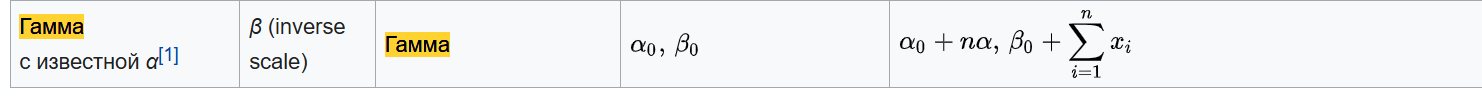
(https://ru.wikipedia.org/wiki/Сопряжённое_априорное_распределение)

Априорное распределение для параметра alpha при известном beta: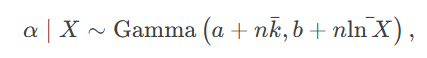

In [ ]:
# Байесовская оценка параметров
# Априорное распределение: Gamma(a_prior, b_prior)
# a_prior, b_prior = 2, 1  # Гиперпараметры
# posterior_a = a_prior + n*alpha
# posterior_b = b_prior + np.sum(sample)

# # Байесовские оценки
# Bayes_alpha = posterior_a / posterior_b
# Bayes_beta = posterior_a / np.sum(sample)

# Доверительные интервалы (по квантилям апостериорного распределения)
alpha_level = 0.05
# Гиперпараметры априорного распределения для alpha
a_prior = 1.0  # Форма априорного распределения
b_prior = 3  # Масштаб априорного распределения

# Обновление априорного распределения до апостериорного
posterior_a = a_prior + n * np.mean(sample)
posterior_b = b_prior + n * np.mean(np.log(sample))
# print(posterior_a,posterior_b)

CI_Bayes_alpha = (
    stats.gamma.ppf(alpha_level / 2, posterior_a, scale=1 / posterior_b),
    stats.gamma.ppf(1 - alpha_level / 2, posterior_a, scale=1 / posterior_b)
)

posterior_a = a_prior + n*alpha
posterior_b = b_prior + np.sum(sample)

CI_Bayes_beta = (
    stats.gamma.ppf(alpha_level / 2, posterior_a, scale=1 / np.sum(sample)),
    stats.gamma.ppf(1 - alpha_level / 2, posterior_a, scale=1 / np.sum(sample))
)

### --- Этап 5: Визуализация ---

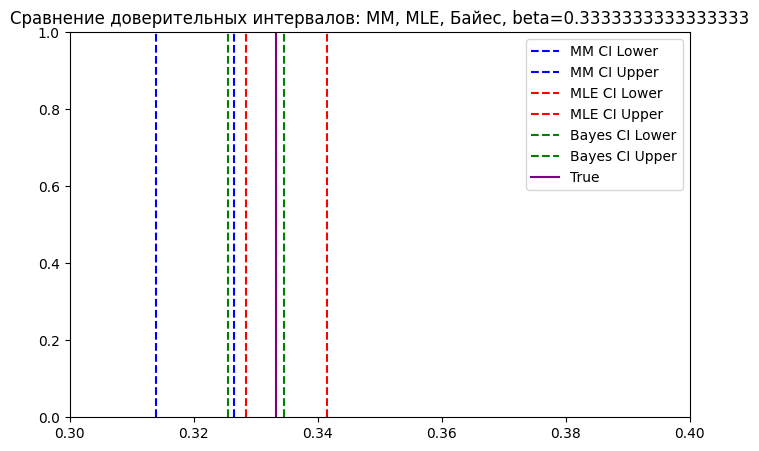

In [ ]:
# Визуализация
plt.figure(figsize=(8, 5))
plt.axvline(CI_MM_beta[0], color='blue', linestyle='--', label='MM CI Lower')
plt.axvline(CI_MM_beta[1], color='blue', linestyle='--', label='MM CI Upper')
plt.axvline(CI_MLE_beta[0], color='red', linestyle='--', label='MLE CI Lower')
plt.axvline(CI_MLE_beta[1], color='red', linestyle='--', label='MLE CI Upper')
plt.axvline(CI_Bayes_beta[0], color='green', linestyle='--', label='Bayes CI Lower')
plt.axvline(CI_Bayes_beta[1], color='green', linestyle='--', label='Bayes CI Upper')
plt.axvline(beta, color='purple', linestyle='-', label='True')

plt.ylim(0, 1)
plt.xlim(0.3,0.4)
plt.title(f"Сравнение доверительных интервалов: MM, MLE, Байес, beta={beta}")
plt.legend()
plt.show()

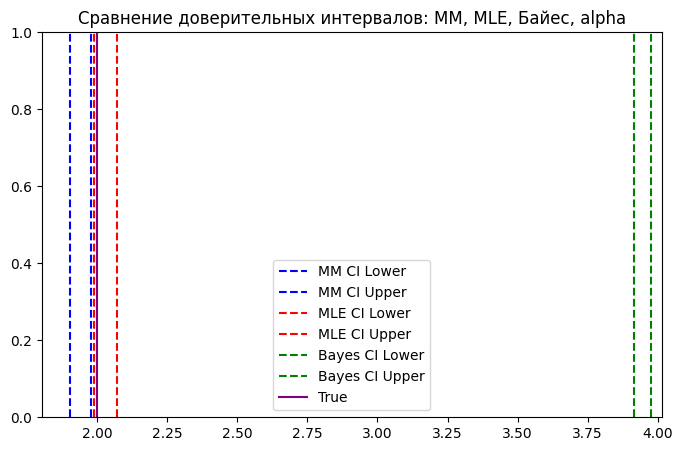

In [ ]:
# Визуализация
plt.figure(figsize=(8, 5))
plt.axvline(CI_MM_alpha[0], color='blue', linestyle='--', label='MM CI Lower')
plt.axvline(CI_MM_alpha[1], color='blue', linestyle='--', label='MM CI Upper')
plt.axvline(CI_MLE_alpha[0], color='red', linestyle='--', label='MLE CI Lower')
plt.axvline(CI_MLE_alpha[1], color='red', linestyle='--', label='MLE CI Upper')
plt.axvline(CI_Bayes_alpha[0], color='green', linestyle='--', label='Bayes CI Lower')
plt.axvline(CI_Bayes_alpha[1], color='green', linestyle='--', label='Bayes CI Upper')
plt.axvline(alpha, color='purple', linestyle='-', label='True')

plt.ylim(0, 1)
plt.title("Сравнение доверительных интервалов: MM, MLE, Байес, alpha")
plt.legend()
plt.show()

### --- Вывод результатов ---

In [ ]:
# Вывод результатов
print(f"Метод моментов: alpha = {MM_alpha}, ДИ = {CI_MM_alpha}")
print(f"Метод максимального правдоподобия: alpha = {MLE_alpha}, ДИ = {CI_MLE_alpha}")
print(f"Байесовский метод: ДИ = {CI_Bayes_alpha}")


Метод моментов: alpha = 1.9402008897747693, ДИ = (1.9021736511074583, 1.9782281284420804)
Метод максимального правдоподобия: alpha = 2.0294813614550966, ДИ = (1.9897042576976236, 2.06925846521257)
Байесовский метод: ДИ = (3.914057592390184, 3.9768900331374986)


In [ ]:
# Вывод результатов
print(f"Метод моментов: beta = {MM_beta}, ДИ = {CI_MM_beta}")
print(f"Метод максимального правдоподобия: _beta = {MLE_beta}, ДИ = {CI_MLE_beta}")
print(f"Байесовский метод: ДИ = {CI_Bayes_beta}")


Метод моментов: beta = 0.3202447813110193, ДИ = (0.31396809893495425, 0.32652146368708435)
Метод максимального правдоподобия: _beta = 0.3349811427048542, ДИ = (0.3284156329528383, 0.34154665245687005)
Байесовский метод: ДИ = (0.32550694121998797, 0.334655455032944)


В качестве выводов можно сказать что:


1.   Байесовский метод реализует самый узкий доверительный интервал, Для MM и MLE доверительные интервалы были построены на основе асимптотической нормальности оценок.Для байесовского подхода доверительный интервал был построен на основе процентилей апостериорного распределения. Метод моментов (MM) показал наибольшую ширину интервала, что связано с его меньшей точностью.
2.   MLE: Чувствителен к изменениям в данных, особенно при малых выборках. Небольшие изменения могут привести к заметным изменениям в оценках.
MM: Менее чувствителен к изменениям, но оценки могут быть менее точными.
Байесовский подход: Устойчив к небольшим изменениям в данных, так как априорное распределение "сглаживает" влияние выбросов. Однако выбор априорного распределения может существенно повлиять на результаты

Очень важно изначально правильно задать априорное распределение параметра распределения, иначе рискуем получить смещенный доверительный интервал
